# Wavelet Transform
## Analisis Sinyal Nonstasioner
Gracia Angelina Jeniffer Masengi
<br>07311940000053

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np
import seaborn as sb
import os

In [4]:
path = 'D:\\~\\Akademik\\Semester 7\\Analisis Sinyal Nonstasioner\\tugas & evaluasi\\tugas 2_program CWT' #local path
signal1 = os.path.join(path, 'Print_03_v2_PCG_PA.txt')
signal2 = os.path.join(path, 'Print_13_v2_PCG_RV.txt')

df = pd.read_csv(signal1, delimiter='\t', header=None)
df2 = pd.read_csv(signal2, delimiter='\t', header=None)

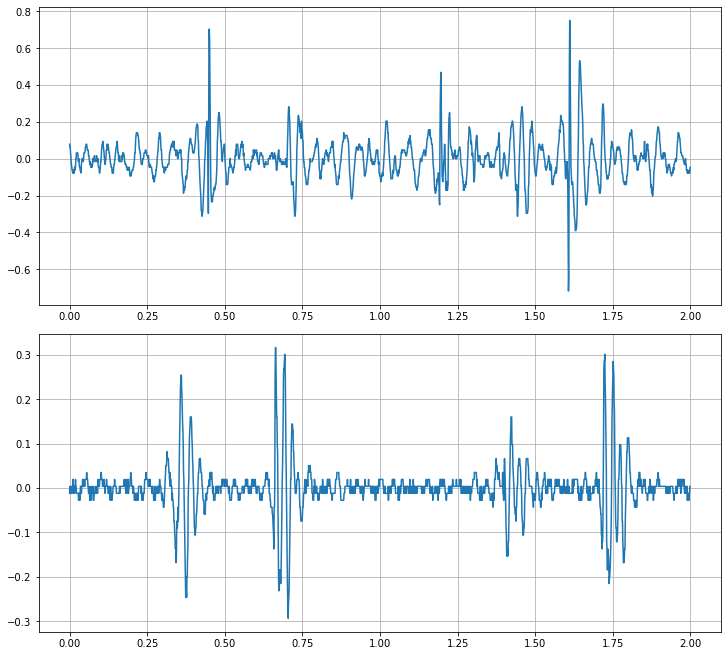

In [5]:
x1 = np.array(df[df.columns[0]])
y1 = np.array(df[df.columns[1]])

x2 = np.array(df2[df2.columns[0]])
y2 = np.array(df2[df2.columns[1]])


fig, axs = plt.subplots(2,1,figsize=(10,9),constrained_layout=True)
axs[0].plot(x1,y1)
axs[1].plot(x2,y2)

for ax in axs.flat:
    ax.grid()

plt.show()

## CWT Function

In [22]:
def calculate(t, a, b, w0):
    re = (1/np.sqrt(a))*(1/np.pi**0.25)*np.exp(-((t-b)/a)**2/2)*np.cos(w0*((t-b)/a))
    im = (1/np.sqrt(a))*(1/np.pi**0.25)*np.exp(-((t-b)/a)**2/2)*-np.sin(w0*((t-b)/a))
    return re, im

def CWT(signal,a0,da):
    if signal == 'Sinyal 1':
        x = x1
        y = y1
    if signal == 'Sinyal 2':
        x = x2
        y = y2
    
    row = 100
    column = 100
    
    N = len(y)
    a = a0 #skala
    dt = 1/1000
    db = (N - 1)*dt/column
    t = np.arange(0, N*dt, dt)
    f0 = 0.849
    w0= 2*np.pi*f0
    
    cwt = np.zeros((row,column))
    for i in range(row):
        b = 0 #translasi
        for j in range(column):
            re, im = calculate(t, a, b, w0)
            re_cwt = np.sum(np.multiply(y, re))
            im_cwt = np.sum(np.multiply(y, im))
            cwt[i, j] = np.sqrt(re_cwt**2 + im_cwt**2)
            b += db
        a += da
        
    plt.figure(figsize=(10,4))
    plt.plot(x,y);
    plt.grid()

    plt.figure(figsize=(12,8))
    ax = sb.heatmap(cwt, cmap='nipy_spectral',xticklabels=False, yticklabels=False)

In [23]:
signal = widgets.Dropdown(
    options = ['Sinyal 1', 'Sinyal 2'],
    description = 'Sinyal')

a = widgets.FloatText(
    value=0.0055,
    description='Skala:',
    disabled=False)

da = widgets.FloatText(
    value=0.001,
    description='ΔSkala',
    disabled=False)

## Time-Frequency Analysis

In [21]:
widgets.interact_manual(CWT, signal=signal, a0=a, da=da)

interactive(children=(Dropdown(description='Sinyal', options=('Sinyal 1', 'Sinyal 2'), value='Sinyal 1'), Floa…

<function __main__.CWT(signal, a0, da)>

In [24]:
widgets.interact_manual(CWT, signal=signal, a0=a, da=da)

interactive(children=(Dropdown(description='Sinyal', options=('Sinyal 1', 'Sinyal 2'), value='Sinyal 1'), Floa…

<function __main__.CWT(signal, a0, da)>